# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sympy import *
x, y = symbols('x y') 
from scipy import interpolate
from sklearn import metrics
from scipy import linalg
from scipy.optimize import minimize
from scipy.optimize import curve_fit
%matplotlib inline

### Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:

raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).  

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [3]:
# a)

[[x, pd.DataFrame( metrics.pairwise.cosine_similarity(raitings) )
        .apply(lambda x: np.where(x > 0.99,np.nan,x))[x]
        .argmax()] 
 for x in range(10)]

[[0, 8],
 [1, 4],
 [2, 9],
 [3, 9],
 [4, 8],
 [5, 9],
 [6, 3],
 [7, 5],
 [8, 0],
 [9, 2]]

In [4]:
# b)

# Приблизим матрицей меньшего ранга. Можно с помощью SVD разложения. А можно подбирать матрицы другими способами.

In [5]:
from sklearn import decomposition

raitings_df = pd.DataFrame(raitings)

pca = decomposition.PCA(n_components=5)
X_centered = raitings_df - raitings_df.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)
X_pca

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

### Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [6]:
diff(((tan(sin(x) + cos(2*x+3)))**2),x)

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [7]:
diff(((tan(sin(x) + cos(2*x+3)))**2),x).evalf(subs={x:1})

55.3859176353379

$2 tan(sin(x) + cos(2 x + 3)) (cos(x) - 2 sin(2 x + 3)) \over cos^2(sin(x) + cos(2 x + 3))$

In [8]:
(  2
 * ( np.tan( np.sin(1) + np.cos(5) ) )
 * ( np.cos(1) - 2 * np.sin(5) )
 / ( np.cos( np.sin(1) + np.cos(5) ) )**2 
)

55.38591763533786

### Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.  
Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

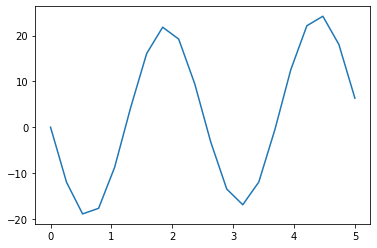

In [9]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

plt.plot(x, fx)
plt.show()

def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [10]:
minimize(error, [10,10], method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 81
         Function evaluations: 162


 final_simplex: (array([[ 3.        , 21.37610416],
       [ 3.00000001, 21.37610417],
       [ 3.        , 21.37610416]]), array([1.32511774e-05, 1.34214438e-05, 1.34725009e-05]))
           fun: 1.325117738648629e-05
       message: 'Optimization terminated successfully.'
          nfev: 162
           nit: 81
        status: 0
       success: True
             x: array([ 3.        , 21.37610416])

In [11]:
f(x,3., 21.37610416)

array([  0.        , -12.01819256, -18.90968631, -17.68786496,
        -8.75291106,   4.27524692,  16.06801305,  21.81250231,
        19.22059876,   9.48411068,  -3.22272984, -13.48576565,
       -16.91096362, -11.95866758,  -0.5863019 ,  12.56873909,
        22.12489368,  24.20292122,  18.04522622,   6.33211019])

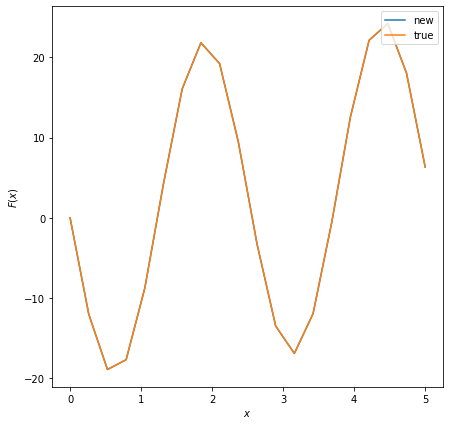

In [12]:
plt.figure(figsize=(7, 7))
plt.plot(x, f(x, 3., 21.37610416), label='new')
plt.plot(x, fx, label='true')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper right')
plt.show()

$=>$  
$a=3$  
$b=21.37610416$ 

### Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A85B5B9C70>]],
      dtype=object)

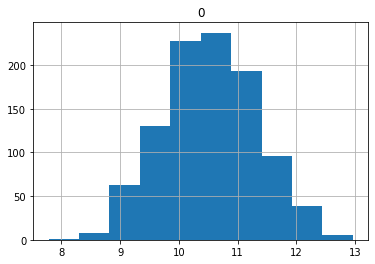

In [13]:
pd.DataFrame([pd.DataFrame([np.random.randint(1,21) for x in range(50)]).mean() for x in range(1000)]).hist()

### Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [14]:
m = np.array([[1, 4],
              [1, 1]])

In [15]:
np.linalg.eig(m)

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

In [16]:
M = Matrix([[1, 4],
            [1, 1]])
M.eigenvals()

{3: 1, -1: 1}

In [17]:
M.eigenvects()

[(-1,
  1,
  [Matrix([
   [-2],
   [ 1]])]),
 (3,
  1,
  [Matrix([
   [2],
   [1]])])]

$(-λ+1)*(-λ+1)-4*1=λ^2-2*λ-3$  
$λ_1=-1$  
$λ_2=3$
___
$m-λ_1*E =   ($  $2,  4 \over 1, 2$ $)$  
$v_1=$ $-2 \over 1$  

$m-λ_2*E =   ($  $-2,  4 \over 1, -2$ $)$  
$v_2=$ $-2 \over 1$